# 🎓 Machine Learning – Project 1  
**Names:** Noam Sella and Omri Peer  
**ID numbers:** 207702929, 323132647  
**Kaggle usernames:** [Omri Peer](https://www.kaggle.com/omripeer), [Noam Sella](https://www.kaggle.com/noamsella)


### 🏠 About the Competition

This project is based on the Kaggle competition "House Prices: Advanced Regression Techniques".  
The goal is to predict house sale prices in Ames, Iowa using a variety of numerical features provided in the dataset.

We approach this as a supervised regression problem, where the target variable is `SalePrice`.  
Since we are limited to using **Linear Regression** in this assignment, we focus on:
- Cleaning and preprocessing the data
- Removing categorical and missing values
- Transforming skewed features
- Scaling numerical features
- Training and evaluating a linear model using RMSE as the main performance metric

Finally, we generate predictions on a separate test set and submit the results to Kaggle for evaluation.


### 📥 Step 1: Importing libraries and loading the dataset

In this step, we import all the necessary libraries for data analysis, visualization, and model training.  
We also mount Google Drive to access the dataset directly from our drive and load the training data (`train.csv`) into a pandas DataFrame named `df`.

Key actions:
- Import libraries like `pandas`, `numpy`, `matplotlib`, and `seaborn` for data handling and plotting.
- Import tools from `sklearn` for preprocessing and evaluation.
- Load the dataset using `pd.read_csv()` and reset the index to make sure it is clean and sequential.
- Display the first few rows of the dataset using `df.head()` to get a quick preview.


In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/MyDrive/Machine Learning Course/Project Part 1/train.csv'
df = pd.read_csv(file_path)
df.reset_index(drop=True, inplace=True)
df.head()

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 🔍 Step 2: Identifying categorical features

In this step, we identify all columns in the dataset that are of type `object`, which typically represent categorical variables (e.g., street names, zoning codes, materials).  
Since we are not using encoding methods yet, we will later drop these columns to work only with numerical data.

Key actions:
- Use `df.select_dtypes(include='object')` to filter out columns with text-based (non-numeric) values.
- Print the names of the object columns and count how many such features exist.


In [ ]:
object_cols = df.select_dtypes(include='object').columns
print("Object columns:")
print(object_cols.tolist())
print("Total:", len(object_cols))

Object columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Total: 43


### 🧹 Step 3: Removing categorical features

Since we are not applying encoding techniques like one-hot encoding or label encoding in this assignment, we remove all categorical (`object`) columns from the dataset.  
This ensures that only numerical features remain, which can be used directly in linear regression.

Key actions:
- Drop all columns identified earlier as categorical using `df.drop(columns=object_cols)`.
- Print the shape of the DataFrame after the removal to verify that the operation was successful.


In [ ]:
df = df.drop(columns=object_cols)

print("Shape after dropping object columns:", df.shape)


Shape after dropping object columns: (1460, 38)


### 🧩 Step 4: Detecting missing values

Before training the model, it's important to handle missing values in the dataset.  
In this step, we check which columns contain missing values and how many are missing in each.

Key actions:
- Use `df.isnull().sum()` to count the number of missing values in each column.
- Filter only the columns where the number of missing values is greater than 0.
- Sort the result to display columns with the most missing values first.


In [ ]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Columns with missing values:")
display(missing)

Columns with missing values:


,0
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


### 🧼 Step 5: Handling missing values

After identifying missing data, we now handle it in two steps:
1. We drop the column `LotFrontage`, which contains the highest number of missing values.
2. We drop any remaining rows that still contain missing values in other columns.

This approach simplifies the dataset by removing incomplete data, allowing us to work only with complete numerical rows.

Key actions:
- Drop the `LotFrontage` column using `df.drop(columns=...)`.
- Drop rows with any remaining missing values using `df.dropna()`.
- Print the new shape of the DataFrame and verify that no missing values remain.


In [ ]:
df = df.drop(columns=['LotFrontage'])

df = df.dropna()

print("Shape after handling missing values:", df.shape)
print("Missing values remaining:", df.isnull().sum().sum())


Shape after handling missing values: (1371, 37)
Missing values remaining: 0


### 📊 Step 6: Descriptive statistics

We use the `describe()` function to generate summary statistics for each numerical column.  
This includes metrics like mean, standard deviation, minimum, maximum, and quartiles.

This step helps us understand the distribution and scale of each feature, and can also guide us in identifying outliers or unusual ranges that may require transformation or further analysis.


In [ ]:
desc = df.describe()
display(desc)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,...,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000,1371.000000
mean,731.169949,56.072210,10686.740336,6.180890,5.582057,1972.808169,1985.342815,108.997082,453.880379,48.382932,...,97.657914,46.994165,21.016047,3.630926,16.038658,2.938001,43.139314,6.330416,2007.811816,185181.890591
std,421.406120,41.063631,10224.805648,1.344125,1.081199,29.374036,20.453845,184.545459,458.982153,164.762510,...,126.759726,64.983737,60.500067,30.241332,57.403495,41.455453,503.065627,2.692423,1.331112,78872.352654
min,1.000000,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,365.500000,20.000000,7734.000000,5.000000,5.000000,1955.000000,1967.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133950.000000
50%,733.000000,50.000000,9591.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,399.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,1094.500000,70.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,171.500000,728.000000,0.000000,...,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 📈 Step 6.1: Correlation analysis with the target variable

To better understand which features are likely to influence `SalePrice`, we calculate the correlation matrix.  
We then display a heatmap showing the correlation between each numerical feature and the target variable `SalePrice`.

Features with high positive or negative correlation are potential strong predictors, while features with near-zero correlation may have limited predictive power.

Key actions:
- Compute Pearson correlation using `df.corr()`.
- Sort and visualize the correlations with `SalePrice` using a heatmap.


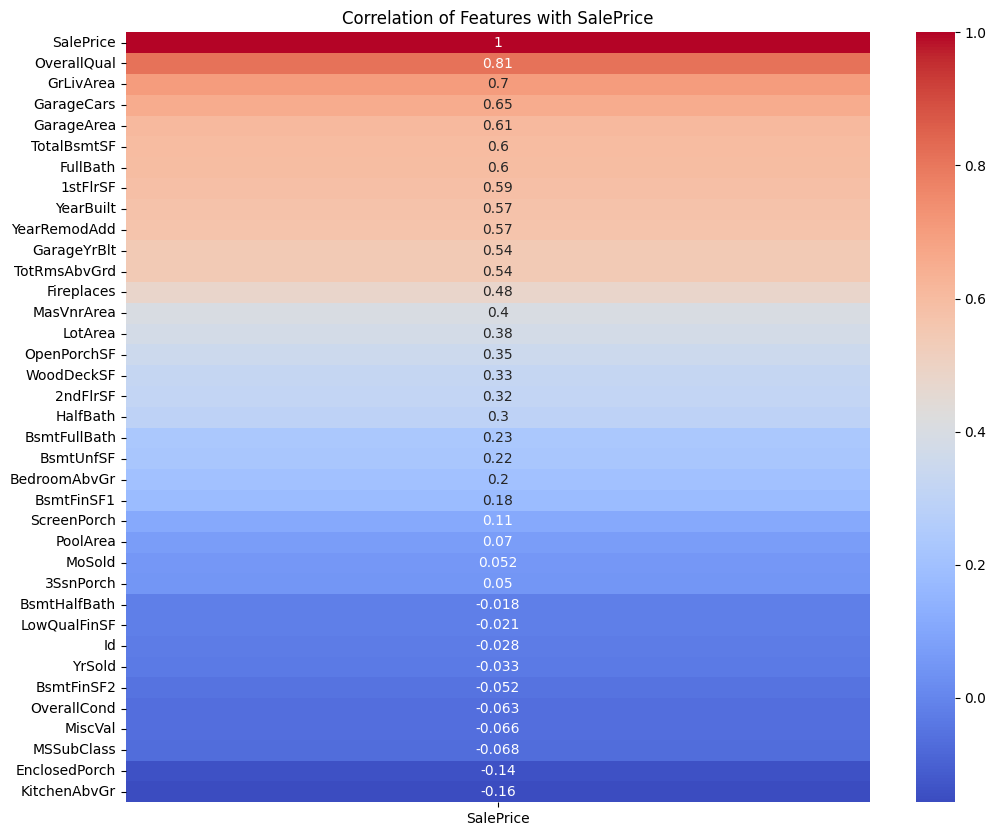

In [ ]:
# Analyze correlation between features and SalePrice
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with SalePrice")
plt.show()

This heatmap shows how each feature is correlated with the target variable `SalePrice`.  
For example, features like `OverallQual`, `GrLivArea`, and `GarageCars` have a strong positive correlation, suggesting they may be important predictors.  
Features with very low or negative correlation (e.g., `PoolArea`, `MiscVal`) might be less useful for prediction.

### 🔹 Step 7: Visualizing Feature Distributions (Histograms)

**What are we doing?**  
We are plotting histograms for a selected subset of numerical features that may contain extreme values or have a wide range of values.

**Why are we doing this?**  
Although the `describe()` function gives us basic statistics (like mean and std), it doesn't show us the shape of the distribution. Using histograms allows us to:
- Visually identify outliers.
- Understand whether a feature is normally distributed, skewed, or has a lot of zero values.
- Decide whether to apply normalization, standardization, or remove extreme values in the next step.

**How are we doing this?**  
We selected several columns (`LotArea`, `SalePrice`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, and `MiscVal`) based on their statistical profiles, and we will now generate histograms for each of them using Matplotlib.


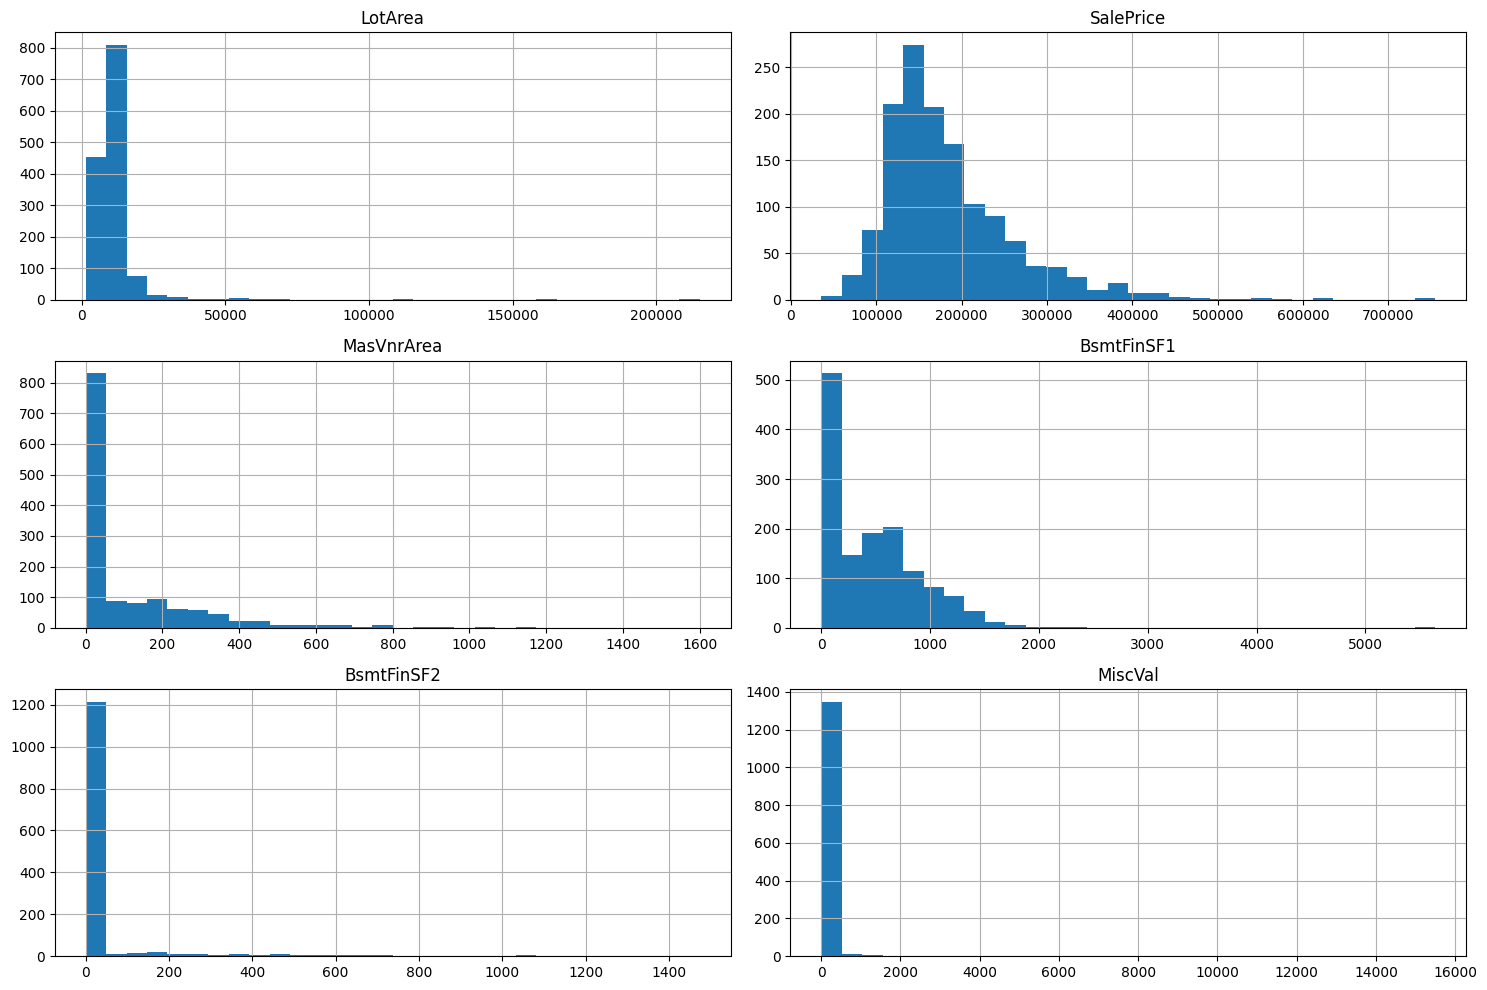

In [ ]:
import matplotlib.pyplot as plt

cols_to_plot = ['LotArea', 'SalePrice', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'MiscVal']

df[cols_to_plot].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### 🔹 Step 8: Log Transformation of Skewed Features

**What are we doing?**  
We are applying a logarithmic transformation to several highly skewed numerical features.

**Why are we doing this?**  
The histograms showed that columns like `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, and `MiscVal` are heavily right-skewed, meaning that they contain many small values and a few very large ones. These extreme values can negatively impact model training, especially for algorithms like linear regression.

Log transformation helps to:
- Reduce skewness
- Normalize distributions
- Make relationships more linear
- Improve model performance

**How are we doing this?**  
We will apply the `np.log1p()` function (log(x+1)) to the selected columns, which safely handles zero values.


In [ ]:
import numpy as np

# Apply log1p to skewed columns
skewed_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'MiscVal', 'SalePrice']
df[skewed_cols] = df[skewed_cols].apply(np.log1p)

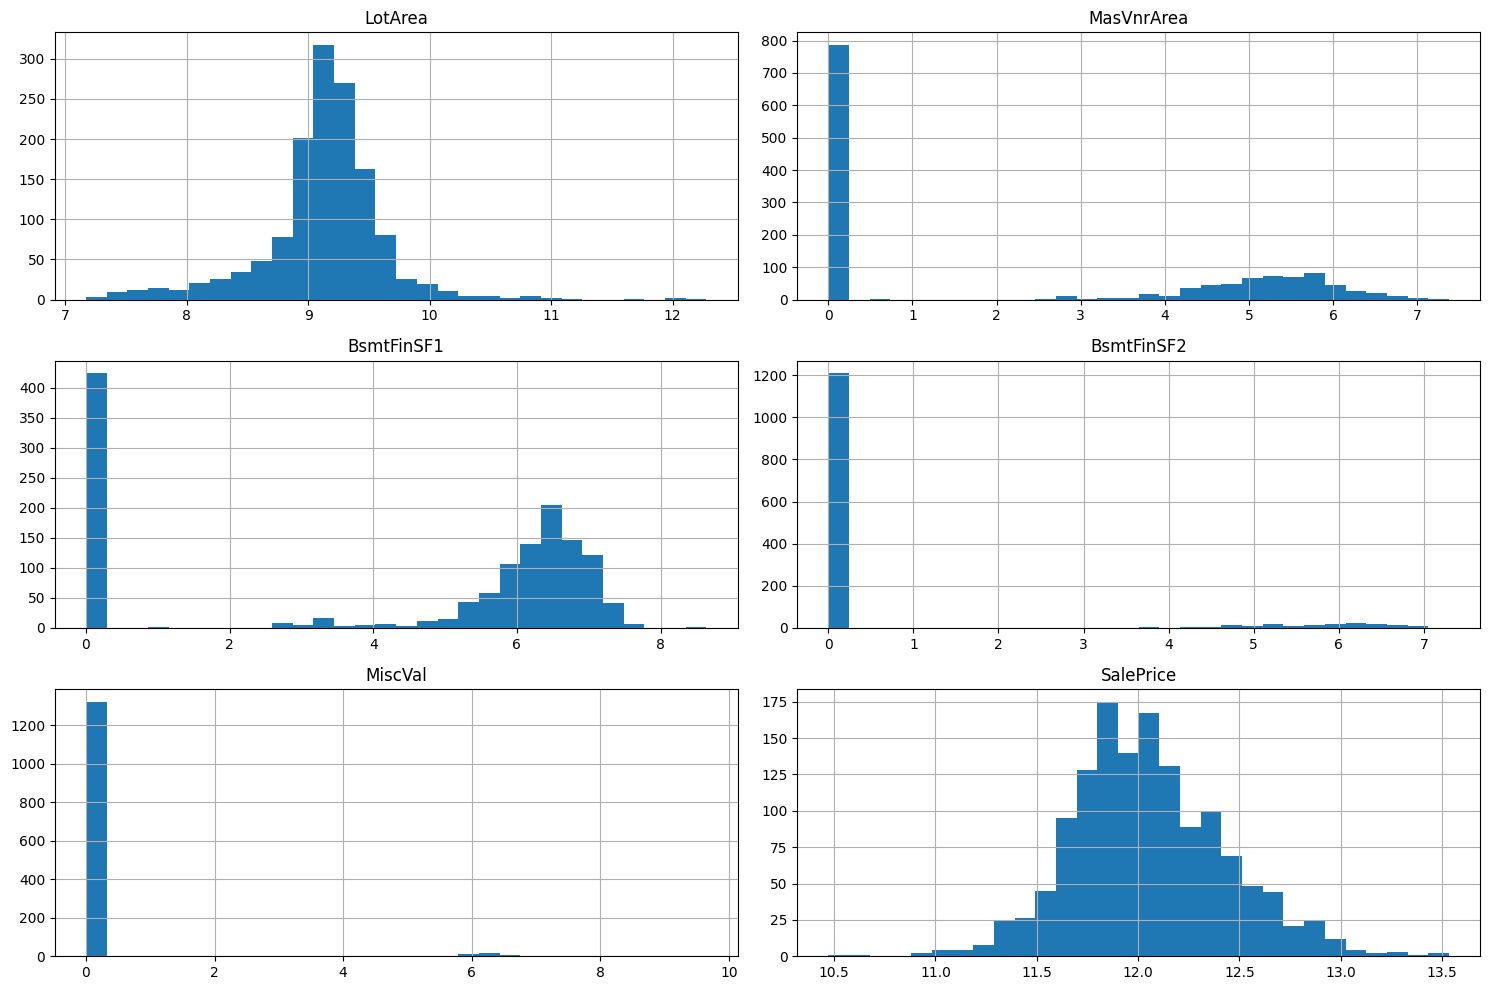

In [ ]:
df[skewed_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

### 🔹 Step 9: Feature Scaling using Standardization

**What are we doing?**  
We are applying standardization (Z-score scaling) to all numerical features.

**Why are we doing this?**  
Different features in our dataset have very different scales. For example, `YearBuilt` ranges from 1800 to 2010, while `PoolArea` ranges from 0 to 700+. This scale mismatch can affect the performance of distance-based and linear models.

Standardization transforms the data so that each feature has a mean of 0 and a standard deviation of 1, allowing the model to treat all features equally.

**How are we doing this?**  
We will use `sklearn.preprocessing.StandardScaler` on all columns **except the target** (`SalePrice`) and the ID column (if present).


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['SalePrice', 'Id']) if 'Id' in df.columns else df.drop(columns=['SalePrice'])
y = df['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


### 🔹 Step 10: Splitting the Training Set into Train and Validation Sets

**What are we doing?**  
We are splitting the original training dataset into two parts:
- A training set for model training
- A validation set for model evaluation

**Why are we doing this?**  
The actual test set (`test.csv`) is not to be used at this stage. Instead, we simulate the test process by holding out a portion of the training data to validate the model's performance during development.

**How are we doing this?**  
We use `train_test_split()` with `test_size=0.2` to split 80% for training and 20% for validation. The model is trained on the 80% and evaluated on the remaining 20% using RMSE.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

y_pred_real = np.expm1(y_pred)
y_valid_real = np.expm1(y_valid)

rmse_real = np.sqrt(mean_squared_error(y_valid_real, y_pred_real))
print(f"Validation RMSE (in actual price): {rmse_real:.2f}")


Validation RMSE (in actual price): 28180.47


### 🎯 Step 11: Visualizing model performance – predicted vs actual values

This plot compares the predicted house prices with the actual sale prices on the validation set.  
Each blue dot represents a single prediction made by the model:
- The x-axis shows the actual `SalePrice`
- The y-axis shows the predicted `SalePrice`

The red dashed line represents the ideal scenario where the predicted value is exactly equal to the actual value (i.e., a perfect prediction).  
The closer the dots are to this line, the better the model's performance.

This visualization helps identify systematic errors and assess the model's overall accuracy.


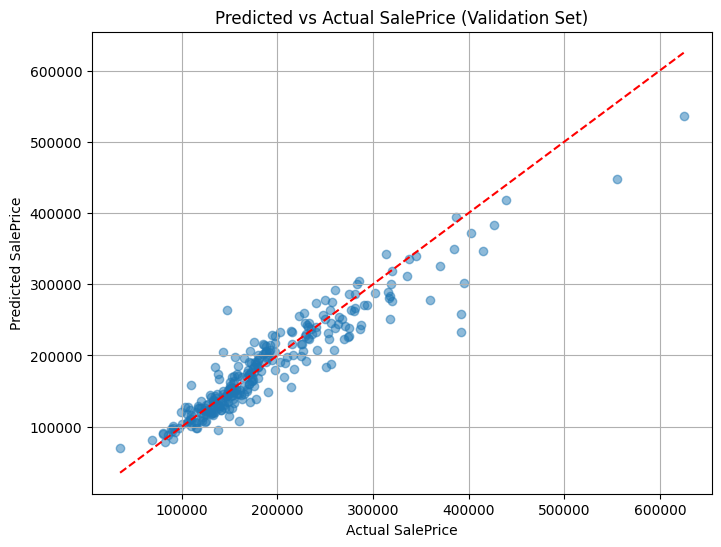

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_valid_real, y_pred_real, alpha=0.5)
plt.plot([y_valid_real.min(), y_valid_real.max()], [y_valid_real.min(), y_valid_real.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (Validation Set)")
plt.grid(True)
plt.show()


### 📤 Step X: Preparing the test set and generating the Kaggle submission file

In this step, we apply the same preprocessing pipeline we used for the training set to the test set.  
The goal is to ensure consistency between training and inference, so the model can make valid predictions.

Steps performed:
1. **Load the test set** from Google Drive.
2. **Store the `Id` column** separately for use in the submission file.
3. **Drop categorical (`object`) columns**, as we did with the training data.
4. **Drop the `LotFrontage` column**, which was removed in the training set due to many missing values.
5. **Drop rows with missing values** to simplify preprocessing (optional: could be imputed instead).
6. **Ensure feature alignment** by keeping only the same columns used in training.
7. **Apply log1p transformation** to the same skewed features as in the training set.
8. **Standardize features** using the previously fitted `StandardScaler`.
9. **Make predictions** using the trained linear regression model.
10. **Apply inverse log transformation** to return predicted values to their original scale.
11. **Build the submission DataFrame**, containing only `Id` and the predicted `SalePrice`.
12. **Export the results to a CSV file**, formatted for submission to the Kaggle competition.

By maintaining the same preprocessing steps, we ensure our model predictions are valid and can be evaluated on Kaggle.


In [ ]:
from sklearn.impute import SimpleImputer

# Load the test dataset
test_path = '/content/drive/MyDrive/Machine Learning Course/Project Part 1/test.csv'
test_df = pd.read_csv(test_path)

# Store the Ids for submission
test_ids = test_df['Id']

# Remove categorical (object) columns
object_cols = test_df.select_dtypes(include='object').columns
test_df = test_df.drop(columns=object_cols)

# Remove 'LotFrontage' column if it exists
if 'LotFrontage' in test_df.columns:
    test_df = test_df.drop(columns=['LotFrontage'])

# Fill missing values using mean imputation instead of dropping rows
imputer = SimpleImputer(strategy='mean')
test_df_imputed = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

# Ensure the column order matches the training data
test_df_imputed = test_df_imputed[X_train.columns]

# Apply log1p transformation to skewed features
skewed_cols = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'MiscVal']
for col in skewed_cols:
    if col in test_df_imputed.columns:
        test_df_imputed[col] = np.log1p(test_df_imputed[col])

# Apply the same standard scaler used during training
test_scaled = scaler.transform(test_df_imputed)

# Convert scaled array back to DataFrame with column names
test_scaled_df = pd.DataFrame(test_scaled, columns=X_train.columns)

# Predict and convert back from log scale
predictions_log = model.predict(test_scaled_df)
predictions = np.expm1(predictions_log)

# Create the submission DataFrame – now with all 1459 rows
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': predictions
})

# Save submission file
submission_path = '/content/drive/MyDrive/Machine Learning Course/Project Part 1/submission.csv'
submission.to_csv(submission_path, index=False)

print(f"✅ Submission file saved to: {submission_path}")


✅ Submission file saved to: /content/drive/MyDrive/Machine Learning Course/Project Part 1/submission.csv


### 🏆 Kaggle Submission

The score we received on the public leaderboard is:
**🔢 RMSLE: 0.14743**

![Kaggle Submission](https://files07.oaiusercontent.com/file-S53jSMGJaieYa6aro2UW5x?se=2025-04-15T11%3A16%3A05Z&sp=r&sv=2024-08-04&sr=b&rscc=max-age%3D299%2C%20immutable%2C%20private&rscd=attachment%3B%20filename%3Dfa44e978-dfc0-47e2-a61d-ad88a3b4ebe3.png&sig=NEuCCNzpAriauYMptO3YTimuA9XVtXXjhXK6y6dgF7c%3D)


### ✅ Summary

In this project, we applied linear regression to predict house prices based on numerical features from the Ames housing dataset.  
We began by cleaning the data: removing categorical columns, handling missing values, applying log transformation to skewed features, and standardizing the data.  
The model was trained on 80% of the dataset and validated on the remaining 20%, using RMSE as the evaluation metric.

✅ **What worked well**:
- Applying `log1p` to skewed features significantly reduced the influence of outliers.
- Standardization helped stabilize the regression performance.
- Feature selection and correlation analysis helped us focus on the most impactful variables.

⚠️ **What didn’t work as well**:
- Dropping all categorical features might have removed useful information — using encoding could improve results in future iterations.
- The model is limited in flexibility because we were restricted to linear regression and could not try more complex models like decision trees or ensembles.

Overall, this project gave us valuable experience in data preprocessing, regression modeling, and evaluation using real-world data.
